# Matrix = Quartz + Calcite   
# Fluid = Water

K(Q) = 36 GPa       
G(Q) = 45 GPa

K(Ca) = 75 GPa
G(Ca) = 31 GPa

V(Q):V(Ca) = 80:20

K(W) = 2.2 GPa     
G(W) = 0 GPa

K(O) = 
G(0) = 

Sw = 1

In [1]:
Kq = 36
Gq = 45

Kca = 75
Gca = 31

Vq = 0.8
Vca = 1 - Vq

Kw = 2.2
Gw = 0

Sw = 1

In [2]:
import numpy as np

porosities = np.arange(0.0, 1.01, 0.01)
print(porosities)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


## Voigt and Reuss bounds

In [3]:
Kv_min = Kq*Vq + Kca*Vca
Gv_min = Gq*Vq + Gca*Vca

Kr_min = 1/(Vq/Kq + Vca/Kca)
Gr_min = 1/(Vq/Gq + Vca/Gca)

Kmin = round((Kv_min + Kr_min)/2, 2)
Gmin = round((Gv_min + Gr_min)/2, 2)

Kfl = Kw
Gfl = Gw

In [4]:
Kv = Kmin*(1 - porosities) + Kw*porosities
Gv = Gmin*(1 - porosities) + Gw*porosities

Kr = 1/((1-porosities)/Kmin  + porosities/Kfl)
Gr = np.zeros_like(Kr)

Kvrh = (Kv + Kr)/2
Gvrh = (Gv + Gr)/2

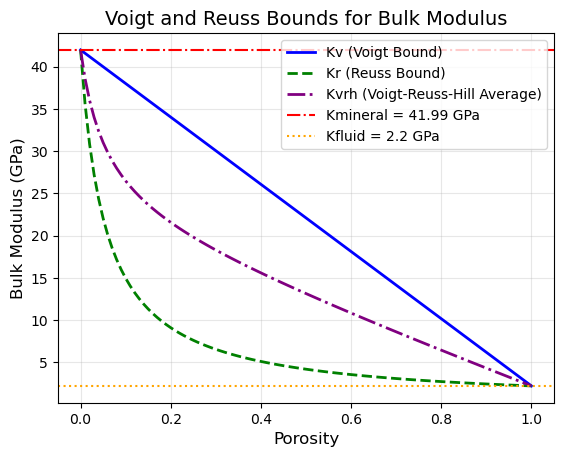

In [5]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))

# Plot Kv and Kr
plt.plot(porosities, Kv, label='Kv (Voigt Bound)', color='blue', linestyle='-', linewidth=2)
# Plot Kr (Reuss Bound)
plt.plot(porosities, Kr, label='Kr (Reuss Bound)', color='green', linestyle='--', linewidth=2)

# Plot Kvrh (Voigt-Reuss-Hill Average)
plt.plot(porosities, Kvrh, label='Kvrh (Voigt-Reuss-Hill Average)', color='purple', linestyle='-.', linewidth=2)

# Mark and indicate Kq and Kw
plt.axhline(y=Kmin, color='red', linestyle='-.', linewidth=1.5, label=f'Kmineral = {Kmin} GPa')
plt.axhline(y=Kfl, color='orange', linestyle=':', linewidth=1.5, label=f'Kfluid = {Kfl} GPa')

# Add labels, title, and legend
plt.xlabel('Porosity', fontsize=12)
plt.ylabel('Bulk Modulus (GPa)', fontsize=12)
plt.title('Voigt and Reuss Bounds for Bulk Modulus', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.show()

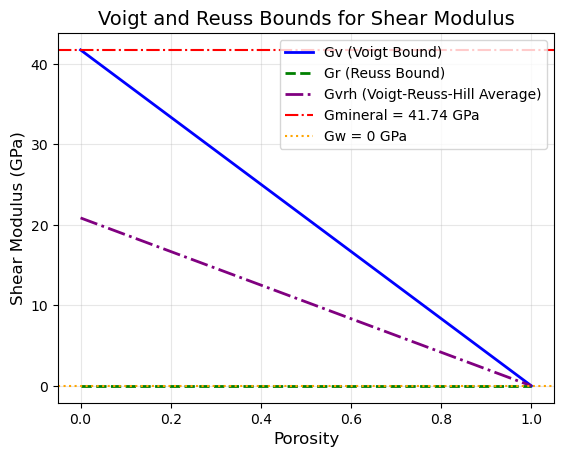

In [6]:
# plt.figure(figsize=(10, 6))

# Plot Gv and Gr
plt.plot(porosities, Gv, label='Gv (Voigt Bound)', color='blue', linestyle='-', linewidth=2)
# Plot Gr (Reuss Bound)
plt.plot(porosities, Gr, label='Gr (Reuss Bound)', color='green', linestyle='--', linewidth=2)

# Plot Gvrh (Voigt-Reuss-Hill Average)
plt.plot(porosities, Gvrh, label='Gvrh (Voigt-Reuss-Hill Average)', color='purple', linestyle='-.', linewidth=2)

# Mark and indicate Gq and Gw
plt.axhline(y=Gmin, color='red', linestyle='-.', linewidth=1.5, label=f'Gmineral = {Gmin} GPa')
plt.axhline(y=Gw, color='orange', linestyle=':', linewidth=1.5, label=f'Gw = {Gw} GPa')

# Add labels, title, and legend
plt.xlabel('Porosity', fontsize=12)
plt.ylabel('Shear Modulus (GPa)', fontsize=12)
plt.title('Voigt and Reuss Bounds for Shear Modulus', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.show()

## Hashin-Shtrikman Bound

In [7]:
K1 = Kmin
K2 = Kw
G1 = Gmin
G2 = Gw
f2 = porosities
f1 = 1 - f2

In [8]:
KHS_upper = K1 + (f2 / (1/(K2 - K1) + f1/(K1 + 4/3*G1)))

GHS_upper = G1 + (f2 / (1/(G2 - G1) + 2*f1*(K1 + 2*G1)/(5*G1*(K1 + 4/3*G1))))

In [9]:
K1, K2 = K2, K1
G1, G2 = G2, G1
f1, f2 = f2, f1

In [10]:
KHS_lower = K1 + (f2 / (1/(K2 - K1) + f1/(K1 + 4/3*G1)))

GHS_lower = np.zeros_like(KHS_lower)

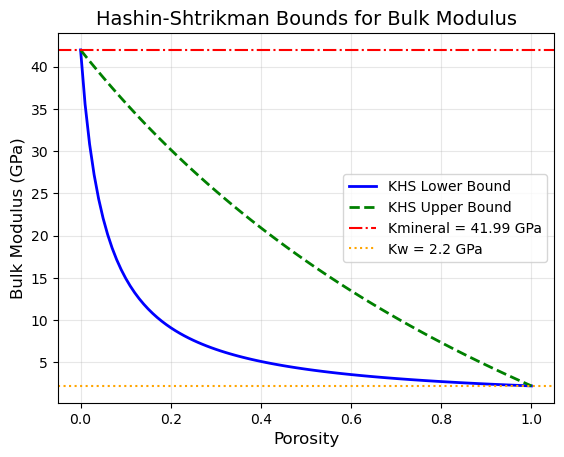

In [11]:
# plt.figure(figsize=(10, 6))

# Plot KHS_lower and KHS_upper
plt.plot(porosities, KHS_lower, label='KHS Lower Bound', color='blue', linestyle='-', linewidth=2)
plt.plot(porosities, KHS_upper, label='KHS Upper Bound', color='green', linestyle='--', linewidth=2)

# Mark and indicate Kq and Kw
plt.axhline(y=Kmin, color='red', linestyle='-.', linewidth=1.5, label=f'Kmineral = {Kmin} GPa')
plt.axhline(y=Kw, color='orange', linestyle=':', linewidth=1.5, label=f'Kw = {Kw} GPa')

# Add labels, title, and legend
plt.xlabel('Porosity', fontsize=12)
plt.ylabel('Bulk Modulus (GPa)', fontsize=12)
plt.title('Hashin-Shtrikman Bounds for Bulk Modulus', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.show()

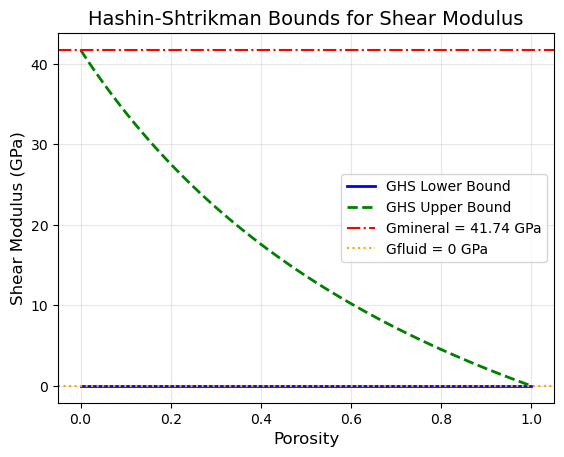

In [12]:
# plt.figure(figsize=(10, 6))

# Plot GHS_lower and GHS_upper
plt.plot(porosities, GHS_lower, label='GHS Lower Bound', color='blue', linestyle='-', linewidth=2)
plt.plot(porosities, GHS_upper, label='GHS Upper Bound', color='green', linestyle='--', linewidth=2)

# Mark and indicate Gq and Gw
plt.axhline(y=Gmin, color='red', linestyle='-.', linewidth=1.5, label=f'Gmineral = {Gmin} GPa')
plt.axhline(y=Gfl, color='orange', linestyle=':', linewidth=1.5, label=f'Gfluid = {Gfl} GPa')

# Add labels, title, and legend
plt.xlabel('Porosity', fontsize=12)
plt.ylabel('Shear Modulus (GPa)', fontsize=12)
plt.title('Hashin-Shtrikman Bounds for Shear Modulus', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.show()

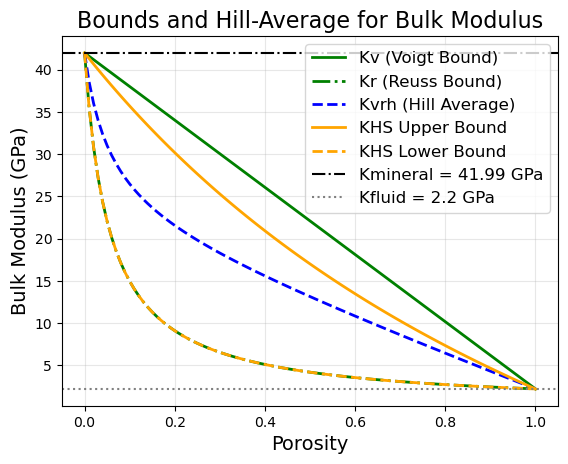

In [13]:
# plt.figure(figsize=(12, 8))

# Plot Voigt and Reuss bounds
plt.plot(porosities, Kv, label='Kv (Voigt Bound)', color='green', linestyle='-', linewidth=2)
plt.plot(porosities, Kr, label='Kr (Reuss Bound)', color='green', linestyle='-.', linewidth=2)

# Plot Hill-average
plt.plot(porosities, Kvrh, label='Kvrh (Hill Average)', color='blue', linestyle='--', linewidth=2)

# Plot HS upper and lower bounds
plt.plot(porosities, KHS_upper, label='KHS Upper Bound', color='orange', linestyle='-', linewidth=2)
plt.plot(porosities, KHS_lower, label='KHS Lower Bound', color='orange', linestyle='--', linewidth=2)

# Mark and indicate Kq and Kw
plt.axhline(y=Kmin, color='black', linestyle='-.', linewidth=1.5, label=f'Kmineral = {Kmin} GPa')
plt.axhline(y=Kfl, color='gray', linestyle=':', linewidth=1.5, label=f'Kfluid = {Kfl} GPa')

# Add labels, title, and legend
plt.xlabel('Porosity', fontsize=14)
plt.ylabel('Bulk Modulus (GPa)', fontsize=14)
plt.title('Bounds and Hill-Average for Bulk Modulus', fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.show()